In [1]:
# Importing all the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Previous application csv file
prevdf = pd.read_csv('previous_application.csv')
# Read the application csv file
currdf = pd.read_csv('application_data.csv')

In [3]:
# To view all the columns at once
pd.set_option('display.max_columns',130)

In [4]:
prevdf.shape   # 1670214 records, 37 columns

(1670214, 37)

In [5]:
prevdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Previous Applications Data

## Data Cleaning 
### 1. Missing values

In [6]:
(prevdf.isna().sum() > 0).sum()   # 16 columns have missing values

16

In [7]:
# Check the columns having some %age of missing values 
prevdf.columns [ ( (prevdf.isna().sum() / prevdf.shape[0]) * 100) > 0 ] 

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

**NAME_TYPE_SUITE** _(Categorical Nominal)_

In [8]:
prevdf.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [9]:
prevdf.NAME_TYPE_SUITE.isna().sum()   

820405

- Null values are greater than the mode of NAME_TYPE_SUITE. 
- It is better to create a new 'Missing' category.

In [10]:
prevdf.NAME_TYPE_SUITE = prevdf.NAME_TYPE_SUITE.fillna('Missing')

**PRODUCT_COMBINATION**

In [11]:
prevdf.PRODUCT_COMBINATION.value_counts().sort_values(ascending = False)

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [12]:
prevdf.PRODUCT_COMBINATION.isna().sum()  

346

The missing values can be replaced by the **Mode of PRODUCT_COMBINATION** by assuming that the missing values was the most frequently occuring value.

In [13]:
prevdf.PRODUCT_COMBINATION = prevdf.PRODUCT_COMBINATION.fillna('Cash')

**CNT_PAYMENT**

In [14]:
prevdf.CNT_PAYMENT.isna().sum()  

372230

`Why is the term of Previous Credit Missing? `

It may be missing because the previous contract was *Cancelled or Refused or Unused offer*.

In [15]:
prevdf[prevdf.CNT_PAYMENT.isna()]['NAME_CONTRACT_STATUS'].value_counts()           

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [16]:
# For Cancelled, Refused and Unused Offer, the term of previous credit is missing. (Meaningful missing)

`To denote, the records with Cancelled, Refused and Unused Offer and no term of previous credit, we can Impute the missing values with -999`

In [17]:
prevdf.CNT_PAYMENT = prevdf.CNT_PAYMENT.fillna(-999)

**RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED**

In [18]:
prevdf.RATE_INTEREST_PRIMARY.isna().sum() / prevdf.shape[0] * 100               # 99% of the values for this column are null

99.6436983524267

In [19]:
prevdf.RATE_INTEREST_PRIVILEGED.isna().sum() / prevdf.shape[0] * 100           # 99% of the values for this column are null

99.6436983524267

In [20]:
# Better to remove both these columns as they will not help us in our analysis
prevdf.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], inplace=True)

**AMT_DOWN_PAYMENT and RATE_DOWN_PAYMENT**

In [21]:
# AMT_DOWN_PAYMENT
prevdf [ prevdf.AMT_DOWN_PAYMENT.isna()].NAME_CONTRACT_STATUS.value_counts()

Approved        374400
Canceled        315676
Refused         203326
Unused offer      2442
Name: NAME_CONTRACT_STATUS, dtype: int64

- There is no down payment if the loan is Canceled, Refused or Unused offer. The missing values are correct for Cancelled, Refused or Unused offer. We can replace with 0.

In [22]:
prevdf = prevdf [~( (prevdf.AMT_DOWN_PAYMENT.isna()) & (prevdf.NAME_CONTRACT_STATUS == 'Approved') ) ]

In [23]:
# There will be not down payment if the loan is Cancelled, Refused or Unused offer.
# Imputing with 0 as the down payment for these records will be 0.

prevdf.AMT_DOWN_PAYMENT = prevdf.AMT_DOWN_PAYMENT.fillna(0)

In [24]:
# RATE_DOWN_PAYMENT
prevdf [ prevdf.RATE_DOWN_PAYMENT.isna()].NAME_CONTRACT_STATUS.value_counts()

Canceled        315676
Refused         203326
Unused offer      2442
Name: NAME_CONTRACT_STATUS, dtype: int64

In [25]:
# There will be not down payment or rate of down payment if the loan is Cancelled, Refused or Unused offer.
# Imputing with 0 as the rate of down payment for these records will be 0.

prevdf.RATE_DOWN_PAYMENT = prevdf.RATE_DOWN_PAYMENT.fillna(0)     

**NFLAG_INSURED_ON_APPROVAL**

In [26]:
prevdf.NFLAG_INSURED_ON_APPROVAL.unique()

array([ 0., nan,  1.])

In [27]:
prevdf [ prevdf.NFLAG_INSURED_ON_APPROVAL.isna()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        316319
Refused         290678
Unused offer     26436
Approved         13413
Name: NAME_CONTRACT_STATUS, dtype: int64

In [28]:
# There will be not Insurance if the loan is Cancelled, Refused or Unused offer.
# Imputing with -999 in these records.

prevdf.NFLAG_INSURED_ON_APPROVAL = prevdf.NFLAG_INSURED_ON_APPROVAL.fillna(-999)     

**DAYS_FIRST_DRAWING, DAYS_FIRST_DUE ,DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION**

In [29]:
#DAYS_FIRST_DRAWING
prevdf [prevdf.DAYS_FIRST_DRAWING.isna()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        316319
Refused         290678
Unused offer     26436
Approved         13413
Name: NAME_CONTRACT_STATUS, dtype: int64

- If the previous loan was Cancelled, Refused or Unused offer, there will be no due date or no disbursement date or termination date. Thus the missing values are 'Meaningful missing'
- Impute these values with -999.

In [30]:
prevdf.DAYS_FIRST_DRAWING = prevdf.DAYS_FIRST_DRAWING.fillna(-999)
prevdf.DAYS_FIRST_DUE = prevdf.DAYS_FIRST_DUE.fillna(-999)
prevdf.DAYS_LAST_DUE_1ST_VERSION = prevdf.DAYS_LAST_DUE_1ST_VERSION.fillna(-999)
prevdf.DAYS_TERMINATION = prevdf.DAYS_TERMINATION.fillna(-999)
prevdf.DAYS_LAST_DUE = prevdf.DAYS_LAST_DUE.fillna(-999)

In [31]:
prevdf.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372231
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT                    0
AMT_GOODS_PRICE                342680
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT                   0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

**AMT_ANNUITY**

In [32]:
prevdf.AMT_ANNUITY.describe()   # Drastic difference between 50% - 75% and 75% to max. Indicates presence of Outliers

count    923583.000000
mean      13272.109454
std       12414.379195
min           0.000000
25%        5625.000000
50%        9497.250000
75%       16099.200000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [33]:
prevdf [prevdf.AMT_ANNUITY.isna()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40898
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

**AMT_GOODS_PRICE**

In [34]:
prevdf [prevdf.AMT_GOODS_PRICE.isna()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305570
Refused          37105
Unused offer         5
Name: NAME_CONTRACT_STATUS, dtype: int64

### 2. Incorrect value handling

In [35]:
prevdf.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [36]:
prevdf.NAME_PRODUCT_TYPE.value_counts()    

XNA        1063611
x-sell      147059
walk-in      85144
Name: NAME_PRODUCT_TYPE, dtype: int64

**Invalid Category XNA**

In [37]:
# NAME_CONTRACT_TYPE
# There is no Contract called 'XNA'
# Better to drop these records as they are also very less in number.

prevdf = prevdf [ ~(prevdf.NAME_CONTRACT_TYPE == 'XNA')]

For the other columns mentioned below, the `records with XNA category are large, dropping these records may result in loss of data`. Better to create **'Invalid'** category for these records

Columns with XNA:
NAME_CASH_LOAN_PURPOSE , NAME_YIELD_GROUP , NAME_PAYMENT_TYPE , CODE_REJECT_REASON, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY , NAME_PORTFOLIO ,  NAME_PRODUCT_TYPE, NAME_SELLER_INDUSTRY

In [38]:
prevdf = prevdf.replace('XNA','Invalid')

- DAYS_FIRST_DUE,   
- DAYS_LAST_DUE_1ST_VERSION,   
- DAYS_LAST_DUE,   
- DAYS_TERMINATION 
- DAYS_FIRST_DRAWING

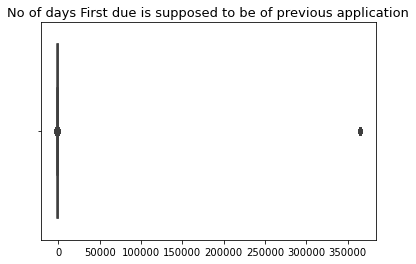

In [39]:
# DAYS_FIRST_DUE


sns.boxplot(prevdf.DAYS_FIRST_DUE)
plt.xlabel('')
plt.ylabel('')
plt.title('No of days First due is supposed to be of previous application',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [40]:
# Checking the outlier value
prevdf [ prevdf.DAYS_FIRST_DUE > 350000 ].DAYS_FIRST_DUE / 365    # Converting to years for easy understanding

150        1000.665753
333        1000.665753
360        1000.665753
387        1000.665753
504        1000.665753
              ...     
1668407    1000.665753
1668514    1000.665753
1668945    1000.665753
1669034    1000.665753
1670199    1000.665753
Name: DAYS_FIRST_DUE, Length: 6934, dtype: float64

In [41]:
# It is never possible that 'No of days First due is supposed to be of previous application' is 1000 years.
# These are invalid records.

# Better to drop these records
prevdf = prevdf [ ~(prevdf.DAYS_FIRST_DUE > 350000) ]

In [42]:
# Similarly, DAYS_LAST_DUE_1ST_VERSION,    DAYS_LAST_DUE,   DAYS_TERMINATION columns also have values greater than 350000.
# These invalid records can be removed.

prevdf = prevdf [ ~(prevdf.DAYS_LAST_DUE_1ST_VERSION > 350000) ]
prevdf = prevdf [ ~(prevdf.DAYS_LAST_DUE > 350000) ]
prevdf = prevdf [ ~(prevdf.DAYS_TERMINATION > 350000) ]
prevdf = prevdf [ ~(prevdf.DAYS_FIRST_DRAWING > 350000) ]


### 3. Checking datatype of columns

In [43]:
prevdf.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY     

**_(Convert from Float to Int)_**

- CNT_PAYMENT                      
- DAYS_FIRST_DRAWING
- DAYS_FIRST_DUE
- DAYS_LAST_DUE_1ST_VERSION
- DAYS_LAST_DUE 
- DAYS_TERMINATION
- NFLAG_INSURED_ON_APPROVAL

In [44]:
# CNT_PAYMENT
prevdf.CNT_PAYMENT = prevdf.CNT_PAYMENT.astype(int)

# DAYS_FIRST_DRAWING
prevdf.DAYS_FIRST_DRAWING = prevdf.DAYS_FIRST_DRAWING.astype(int)

# DAYS_FIRST_DUE
prevdf.DAYS_FIRST_DUE = prevdf.DAYS_FIRST_DUE.astype(int)

# DAYS_LAST_DUE_1ST_VERSION
prevdf.DAYS_LAST_DUE_1ST_VERSION = prevdf.DAYS_LAST_DUE_1ST_VERSION.astype(int)

# DAYS_LAST_DUE
prevdf.DAYS_LAST_DUE = prevdf.DAYS_LAST_DUE.astype(int)

# DAYS_TERMINATION
prevdf.DAYS_TERMINATION = prevdf.DAYS_TERMINATION.astype(int)

# NFLAG_INSURED_ON_APPROVAL
prevdf.NFLAG_INSURED_ON_APPROVAL = prevdf.NFLAG_INSURED_ON_APPROVAL.astype(int)

### 4. Checking Outliers

In this section, I have removed the outliers that were very much likely to distort my analysis and at the same time, preserved the outlier records that were large in number and would result in loss of data if removed. 

In [45]:
# There are some columns like AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, etc. that have the floating numbers 
# But in descibe they are shown in exponential form

# To avoid the exponential form, setting the display format to 3 decimal places with , separator to easily read the values
pd.set_option('display.float_format','{:,.3f}'.format)

**AMT_ANNUITY**

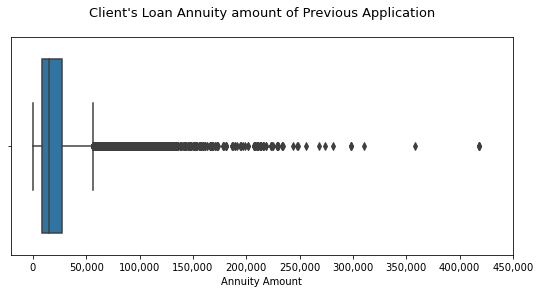

In [46]:
plt.figure(figsize=[9,4])

sns.boxplot(prevdf.AMT_ANNUITY)
plt.xlabel('Annuity Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,500000,50000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Loan Annuity amount of Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [47]:
# IQR is narrow and Most of the Annuity amounts are below 50,000. Many records that deviate from the general trend.  
# The ones above 50,000 are called Outliers. There are large number of outliers and these may skew our analysis.

# Removing the extreme outliers with Annuity above 250,000
prevdf = prevdf [~(prevdf.AMT_ANNUITY > 250000)]

There are many records that have Loan Annuity greater than 50,000. Instead of removing all these records and loosing important data, it is better to consider 75th percentile for this column for analysis

**AMT_APPLICATION**

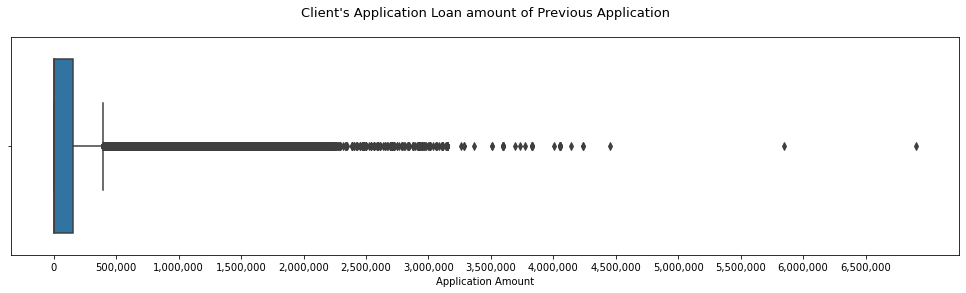

In [48]:
plt.figure(figsize=[17,4])

sns.boxplot(prevdf.AMT_APPLICATION)
plt.xlabel('Application Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,7000000,500000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Application Loan amount of Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [49]:
# Large number of outliers. 70% of the clients applied for Loan Amount below 500,000. 

# Removing the extreme outliers with Application Amount above 3,000,000
prevdf = prevdf [~(prevdf.AMT_APPLICATION > 3000000)]

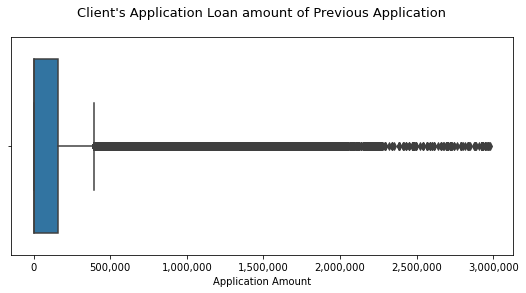

In [50]:
plt.figure(figsize=[9,4])

sns.boxplot(prevdf.AMT_APPLICATION)
plt.xlabel('Application Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,3500000,500000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Application Loan amount of Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

There are many clients who have Application Amount greater than 500,000. Instead of removing all these records and loosing important data, it is better to consider 75th percentile for this column for analysis

**AMT_CREDIT**

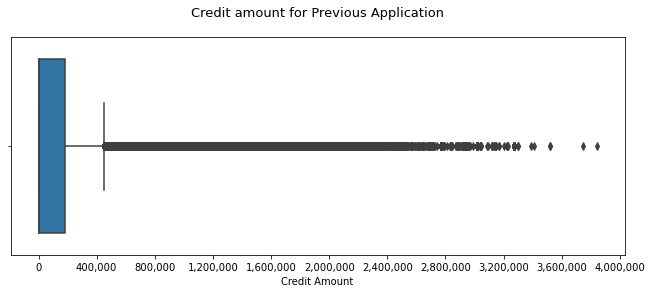

In [51]:
plt.figure(figsize=[11,4])

sns.boxplot(prevdf.AMT_CREDIT)
plt.xlabel('Credit Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,4400000,400000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Credit amount for Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [52]:
# Large number of outliers. 70% of the clients recevied Credit Amount below 400,000. 

# Removing the extreme outliers with Credit Amount about 2,800,000
prevdf = prevdf [~(prevdf.AMT_CREDIT > 2800000)]

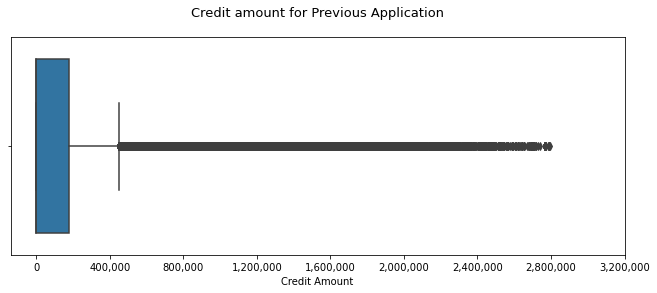

In [53]:
plt.figure(figsize=[11,4])

sns.boxplot(prevdf.AMT_CREDIT)
plt.xlabel('Credit Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,3400000,400000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Credit amount for Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

Many clients recevied Credit Amount above 400,000. These deviate from the general trend. Better to consider 75th percentile for this column for our analysis

**AMT_DOWN_PAYMENT**

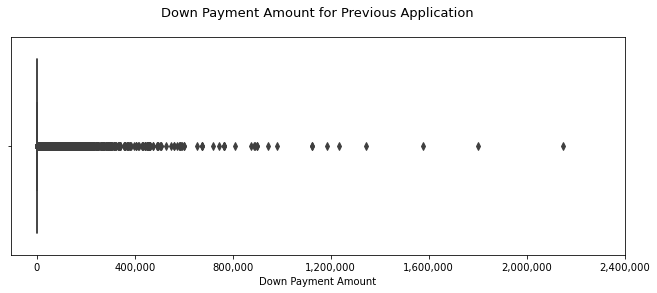

In [54]:
plt.figure(figsize=[11,4])

sns.boxplot(prevdf.AMT_DOWN_PAYMENT)
plt.xlabel('Down Payment Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,2500000,400000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Down Payment Amount for Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [55]:
# The IQR seems like a line, indicating difference between 75th and 25th percentile is less.
# Large number of Outliers are present.

prevdf = prevdf [ ~(prevdf.AMT_DOWN_PAYMENT > 600000) ]   # Removing the records with Down Payment Amount greater than 600,000

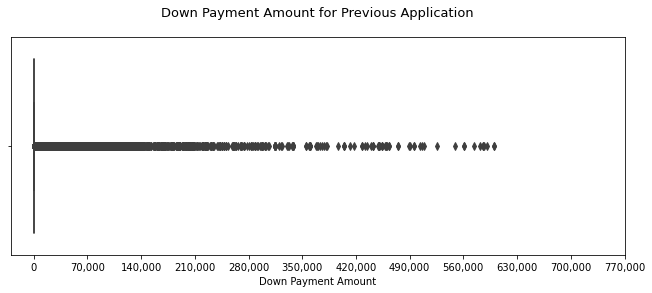

In [56]:
plt.figure(figsize=[11,4])

sns.boxplot(prevdf.AMT_DOWN_PAYMENT)
plt.xlabel('Down Payment Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,800000,70000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Down Payment Amount for Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

Still many outliers. We will consider 75th percentile for Down Payment column to avoid loss of data (if records are dropped)

**AMT_GOODS_PRICE**

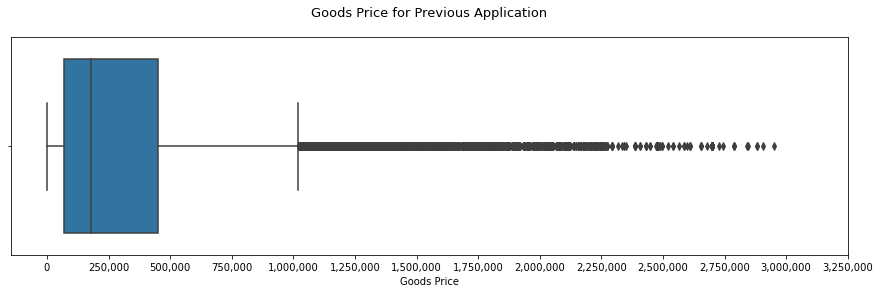

In [57]:
plt.figure(figsize=[15,4])

sns.boxplot(prevdf.AMT_GOODS_PRICE)
plt.xlabel('Goods Price')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,3400000,250000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Goods Price for Previous Application\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [58]:
# Gap between 75th percentile and Upper fence is much larger than min and 25th percentile.
# There are many clients who applied for Good's Price greater than median good's price.

# The outlier values seem to be continuous, we can drop the records with Goods Price greater than 2,500,000.
prevdf = prevdf [~(prevdf.AMT_GOODS_PRICE > 2500000)]

To prevent remaining outliers from skewing the analysis, 75th percentile for Goods Price column will be considered for Analysis

### 5. Checking duplicate rows

In [59]:
prevdf.duplicated().sum()   # No duplicate rows

0

### 6. Creating new columns / Modifying existing columns

- **AMT_CREDIT** 
_( Credit amount of Previous loan)_  , **AMT_APPLICATION** 
_( Amount that Client applied for in the Previous Application)_  =>  **AMT_CREDIT_APPLY_DIFF** 
_( Difference between Credit and Application Amount of Previous Application)_ 

In [60]:
# AMT_CREDIT_APPLY_DIFF
prevdf['AMT_CREDIT_APPLY_DIFF'] =  prevdf.AMT_CREDIT - prevdf.AMT_APPLICATION 

- **DAYS_DECISION** _(Convert all negative values to positive)_

In [61]:
prevdf.DAYS_DECISION = prevdf.DAYS_DECISION * -1       # Converting -ve column to positive for easy understanding. 

## Univariate Analysis

In this section, various plots have **'Invalid'** Category. 
We had replaced the invalid value XNA in the earlier part (`2. Incorrect value handling`). 
Please ignore this Category.

In [62]:
sns.set_theme(style="whitegrid")  #Setting theme for plots

**Categorical Columns**

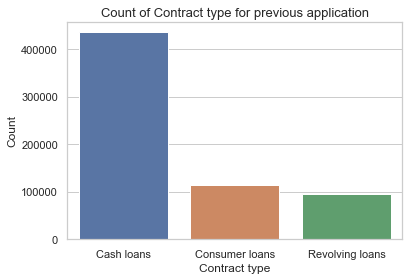

In [63]:
# NAME_CONTRACT_TYPE

sns.countplot(prevdf.NAME_CONTRACT_TYPE)
plt.xlabel('Contract type')
plt.ylabel('Count')
plt.title('Count of Contract type for previous application',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Most of the clients applied for Cash loans in their previous application. 
# Revolving loans were not so popular.

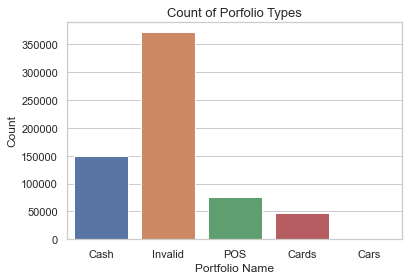

In [64]:
# NAME_PORTFOLIO

sns.countplot(prevdf['NAME_PORTFOLIO'])
plt.xlabel('Portfolio Name')
plt.ylabel('Count')
plt.title('Count of Porfolio Types',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Previous applications were mostly for Cash, followed by POS and Cards

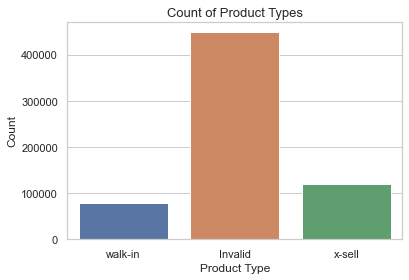

In [65]:
#NAME_PRODUCT_TYPE

sns.countplot(prevdf['NAME_PRODUCT_TYPE'])
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Count of Product Types',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# More clients had x-sell applications. 

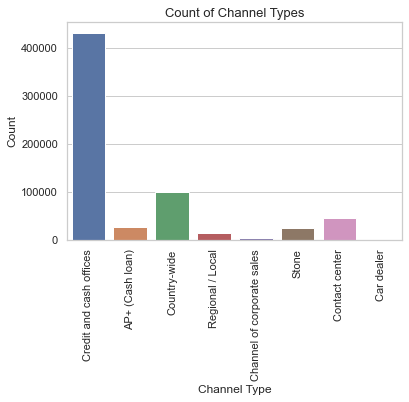

In [66]:
# CHANNEL_TYPE

sns.countplot(prevdf['CHANNEL_TYPE'])
plt.xticks(rotation=90)
plt.xlabel('Channel Type')
plt.ylabel('Count')
plt.title('Count of Channel Types',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Most of the Clients were acquired through 'Credit and Cash offices' and 'Country-wide' 

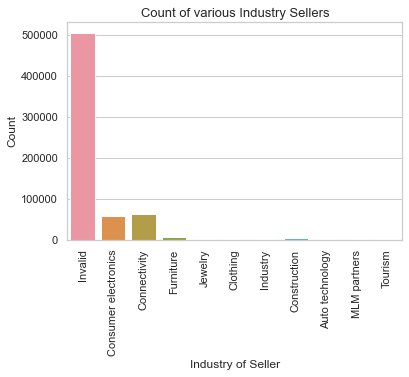

In [67]:
# NAME_SELLER_INDUSTRY

sns.countplot(prevdf['NAME_SELLER_INDUSTRY'])
plt.xticks(rotation=90)
plt.xlabel('Industry of Seller')
plt.ylabel('Count')
plt.title('Count of various Industry Sellers',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Consumer Electronics amd Connectivity are the most popular Industry sellers

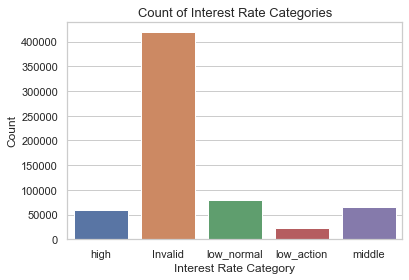

In [68]:
# NAME_YIELD_GROUP

sns.countplot(prevdf['NAME_YIELD_GROUP'])
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.title('Count of Interest Rate Categories',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Not a major count difference wrt to Interest Rate Category
# Low-normal is slighly more popular than high/ middle/ low-action

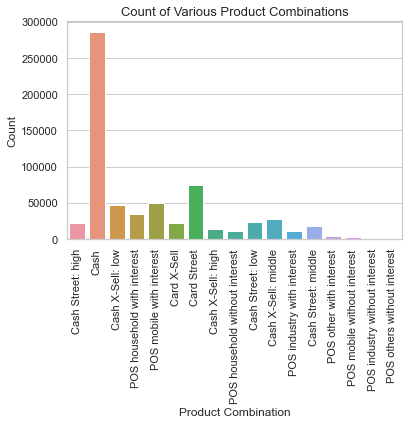

In [69]:
# PRODUCT_COMBINATION

sns.countplot(prevdf['PRODUCT_COMBINATION'])
plt.xticks(rotation=90)
plt.xlabel('Product Combination')
plt.ylabel('Count')
plt.title('Count of Various Product Combinations',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Large chunk of clients applied for Cash in their previous application

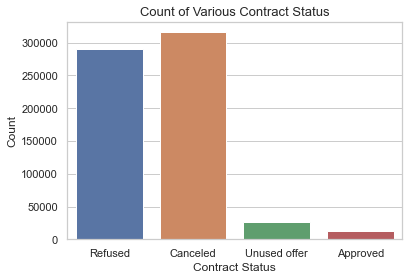

In [70]:
# NAME_CONTRACT_STATUS

sns.countplot(prevdf['NAME_CONTRACT_STATUS'])
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.title('Count of Various Contract Status',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Only a very few of the loan applications were Approved in previous year.
# Most of them were Cancelled or Refused

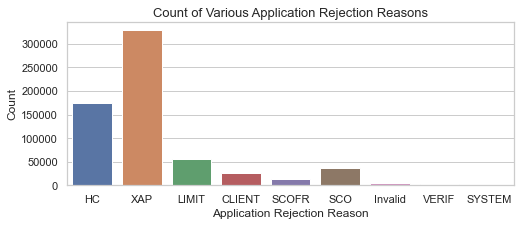

In [71]:
# CODE_REJECT_REASON

plt.figure(figsize=[8,3])
sns.countplot(prevdf['CODE_REJECT_REASON'])
plt.xlabel('Application Rejection Reason')
plt.ylabel('Count')
plt.title('Count of Various Application Rejection Reasons',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Assuming XAP  not a valid rejection reason
# Many clients were rejected due to HC reason, followed by LIMIT.

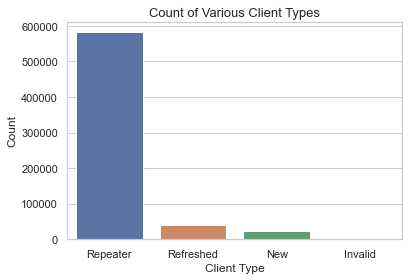

In [72]:
# NAME_CLIENT_TYPE

sns.countplot(prevdf['NAME_CLIENT_TYPE']) 
plt.xlabel('Client Type')
plt.ylabel('Count')
plt.title('Count of Various Client Types',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Most of the Clients are Repeaters. They are old clients. 
# Refreshed and New are very less in number

**Day columns (Day EMI due, Day Last EMI due, etc.)**

In [73]:
dayCols = []
# Countplot for all categorical variables
for i in prevdf.columns:
    if str(i).startswith('DAYS') :
        dayCols.append(i)
dayCols

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

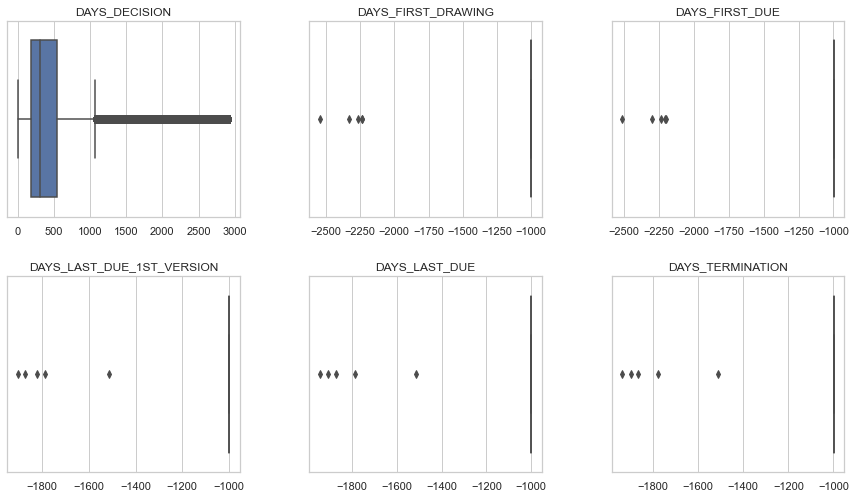

In [74]:
plt.figure(figsize=(15, 13))
plt.subplots_adjust(wspace = 0.3, hspace=0.3)

for index,i in enumerate(dayCols):
    plotPos =  index+1
    axis = plt.subplot(3,3,plotPos)
    sns.boxplot(prevdf[i])
    plt.xlabel('')
    plt.title(i)

In [75]:
# DAYS_DECISION has a large number of outliers.

# All columns accept DAYS_DECISION have majority of -999 records. Only 3-4 other records are there. 
# These columns are not meaningful for our analysis 

## Merging with Current Applications data

In [76]:
# Taking twp columns from Applications.csv (mainly Target variable)
currdf = currdf [['TARGET','SK_ID_CURR']]

# Merging the data
merged = currdf.merge(prevdf, on = 'SK_ID_CURR', how = 'inner')

In [77]:
merged.head()

,TARGET,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CREDIT_APPLY_DIFF
0,0,100006,2827850,Revolving loans,NaN,0.000,0.000,0.000,NaN,THURSDAY,15,Y,1,0.000,XAP,Canceled,181,Invalid,XAP,Missing,Repeater,Invalid,Invalid,Invalid,Credit and cash offices,-1,Invalid,-999,Invalid,Card Street,-999,-999,-999,-999,-999,-999,0.000
1,0,100006,1243599,Cash loans,NaN,0.000,0.000,0.000,NaN,THURSDAY,15,Y,1,0.000,Invalid,Canceled,181,Invalid,XAP,Missing,Repeater,Invalid,Invalid,Invalid,Credit and cash offices,-1,Invalid,-999,Invalid,Cash,-999,-999,-999,-999,-999,-999,0.000
2,0,100006,2545789,Cash loans,NaN,0.000,0.000,0.000,NaN,THURSDAY,15,Y,1,0.000,Invalid,Canceled,181,Invalid,XAP,Missing,Repeater,Invalid,Invalid,Invalid,Credit and cash offices,-1,Invalid,-999,Invalid,Cash,-999,-999,-999,-999,-999,-999,0.000
3,0,100006,1697039,Cash loans,"32,696.100","688,500.000","906,615.000",0.000,"688,500.000",THURSDAY,15,Y,1,0.000,Invalid,Refused,181,Cash through the bank,LIMIT,Unaccompanied,Repeater,Invalid,Cash,x-sell,Credit and cash offices,-1,Invalid,48,low_normal,Cash X-Sell: low,-999,-999,-999,-999,-999,-999,"218,115.000"
4,0,100008,1757431,Cash loans,NaN,0.000,0.000,0.000,NaN,FRIDAY,18,Y,1,0.000,Invalid,Canceled,82,Invalid,XAP,Missing,Repeater,Invalid,Invalid,Invalid,Credit and cash offices,-1,Invalid,-999,Invalid,Cash,-999,-999,-999,-999,-999,-999,0.000


In [78]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537833 entries, 0 to 537832
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       537833 non-null  int64  
 1   SK_ID_CURR                   537833 non-null  int64  
 2   SK_ID_PREV                   537833 non-null  int64  
 3   NAME_CONTRACT_TYPE           537833 non-null  object 
 4   AMT_ANNUITY                  230938 non-null  float64
 5   AMT_APPLICATION              537833 non-null  float64
 6   AMT_CREDIT                   537833 non-null  float64
 7   AMT_DOWN_PAYMENT             537833 non-null  float64
 8   AMT_GOODS_PRICE              256143 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   537833 non-null  object 
 10  HOUR_APPR_PROCESS_START      537833 non-null  int64  
 11  FLAG_LAST_APPL_PER_CONTRACT  537833 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       537833 non-null  int64  
 13 

## Bivariate Analysis and Multivariate Analysis

**Target vs Contract Status**

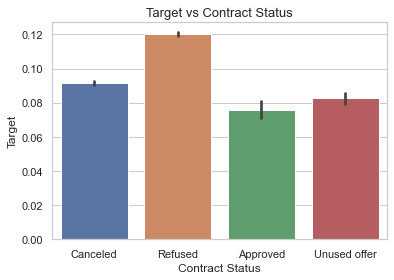

In [79]:
sns.barplot(merged['NAME_CONTRACT_STATUS'] , merged['TARGET'])
plt.xlabel('Contract Status')
plt.ylabel('Target')
plt.title('Target vs Contract Status',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

**Target vs Cash loan Purpose**

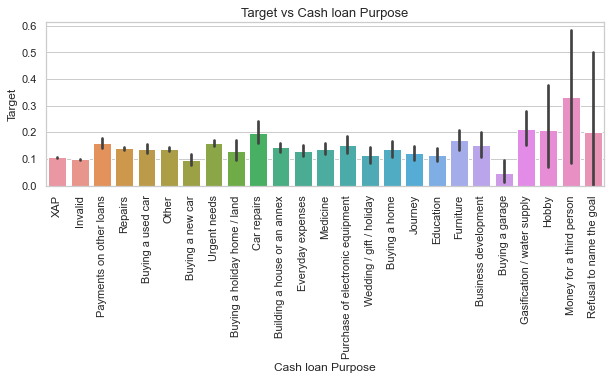

In [80]:
plt.figure(figsize=[10,3])
sns.barplot(merged['NAME_CASH_LOAN_PURPOSE'] , merged['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('Cash loan Purpose')
plt.ylabel('Target')
plt.title('Target vs Cash loan Purpose',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients who 'took 'Money for third person', 'Water supply', 'Car repairs' and 'Hobby' are more likely to default than other.

**Target vs Portfolio**

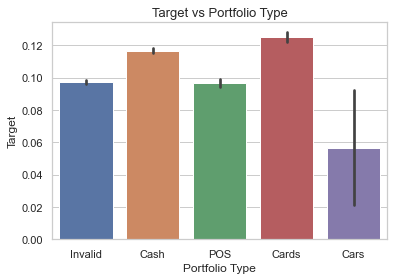

In [81]:
sns.barplot(merged['NAME_PORTFOLIO'] , merged['TARGET'])
plt.xticks(rotation = None)
plt.xlabel('Portfolio Type')
plt.ylabel('Target')
plt.title('Target vs Portfolio Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients whose previous aopplications were for Cards and Cash have more chances of defaulting.

**Difference between Application and Credit Amount vs Portfolio Type**

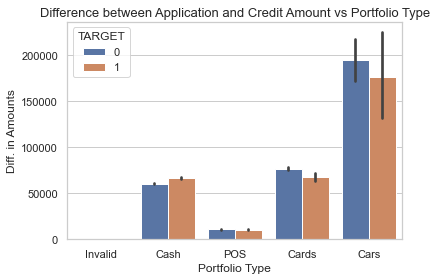

In [82]:
data = pd.pivot_table(merged, index='NAME_PORTFOLIO',columns=['NAME_CONTRACT_STATUS'],values='TARGET', aggfunc=np.mean)
sns.barplot(merged['NAME_PORTFOLIO'], abs(merged['AMT_CREDIT_APPLY_DIFF']) , merged.TARGET)
plt.xlabel('Portfolio Type')
plt.ylabel('Diff. in Amounts')
plt.title('Difference between Application and Credit Amount vs Portfolio Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Cars have maximum difference between Application and Credit Amount
# For Defaulters, with Portfolio 'Cash', the difference between Application and Credit Amount is slightly higher as compared to Non-defaulters.

**Target vs Contract Type**

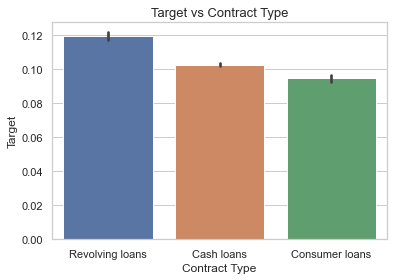

In [83]:

sns.barplot(merged['NAME_CONTRACT_TYPE'] , merged['TARGET'])
plt.xticks(rotation = None)
plt.xlabel('Contract Type')
plt.ylabel('Target')
plt.title('Target vs Contract Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients who had Revolving loans have high defaulting chances, followed by Cash Loans and Consumer Loans

**Contract Status vs Contract Type**

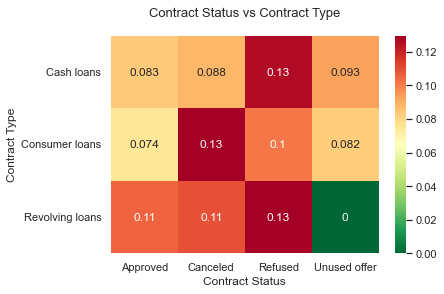

In [84]:
data = pd.pivot_table(merged, index='NAME_CONTRACT_TYPE',columns=['NAME_CONTRACT_STATUS'],values='TARGET', aggfunc=np.mean)

sns.heatmap(data, cmap='RdYlGn_r', annot = True)
plt.xlabel('Contract Status')
plt.ylabel('Contract Type')
plt.title('Contract Status vs Contract Type\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients whose previous loan application for loans were rejected have high defaulting tendency.
# Clients who applied for Consumer Loans previously and the loan was cancelled, also have high defaulting tendency.
# Clients whose previous application for Revolving Loans, has Unused Offer are BEST with least defaulting tendency.

**Target vs Product Type**

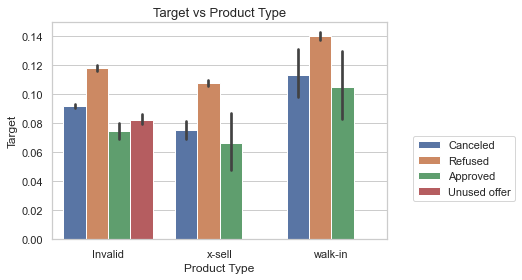

In [85]:
sns.barplot(merged['NAME_PRODUCT_TYPE'] , merged['TARGET'], hue=merged.NAME_CONTRACT_STATUS)
plt.xticks(rotation = None)
plt.xlabel('Product Type')
plt.ylabel('Target')
plt.title('Target vs Product Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.legend(loc='best', bbox_to_anchor=(0.9, 0., 0.5, 0.5))
plt.show()

# Walk-in product type has high defaulting tendency as comapred to x-sell
# x-sell is a safe option as for all statuses Refused, Approved or Cancelled, the target values are less (defaulting chances are less) than walk-in  .

**Target vs Client Type**

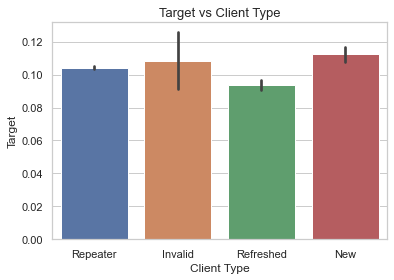

In [86]:
sns.barplot(merged['NAME_CLIENT_TYPE'] , merged['TARGET'])
plt.xticks(rotation = None)
plt.xlabel('Client Type')
plt.ylabel('Target')
plt.title('Target vs Client Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# There isn't much difference between New, Repeater and Refreshed Clients
# New clients have slightly more defaulting tendency, followed by Repeater and Refreshed.

**Client Type vs Product Type**

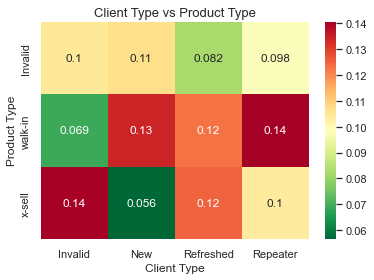

In [87]:
data = pd.pivot_table(merged, columns='NAME_CLIENT_TYPE',index=['NAME_PRODUCT_TYPE'],values='TARGET', aggfunc=np.mean)

sns.heatmap(data, cmap='RdYlGn_r', annot = True)
plt.xlabel('Client Type')   
plt.ylabel('Product Type')
plt.title('Client Type vs Product Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# New Clients - x-sell Product Type have almost 0 defaulting chances
# New, Repeater Clients - walk-in Product Type have high defaulting chances. 

**Target vs Channel Type**


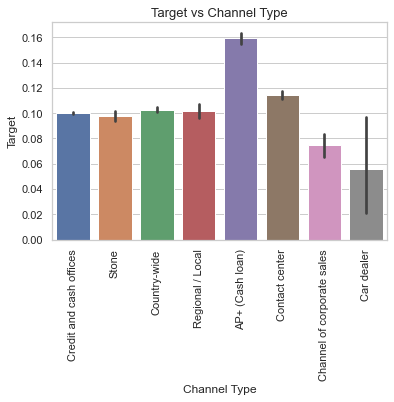

In [88]:
sns.barplot(merged['CHANNEL_TYPE'] , merged['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('Channel Type')
plt.ylabel('Target')
plt.title('Target vs Channel Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients who were acquired through AP+ (Cash loan) and Contact center have high defaulting tendency.
# Clients acquired through Channel of Corporate sales and Car dealer have low defaulting tendency.

**Target vs Payment Type**

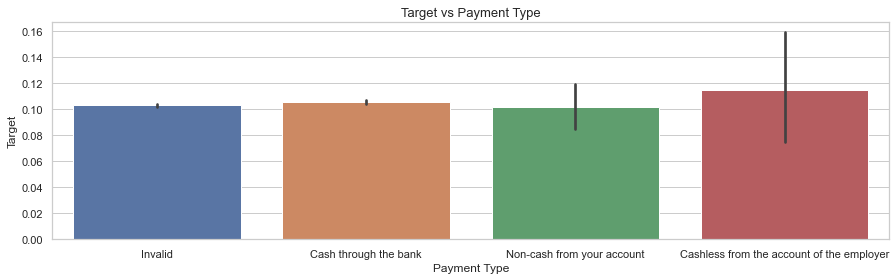

In [89]:
plt.figure(figsize=[15,4])
sns.barplot(merged['NAME_PAYMENT_TYPE'] , merged['TARGET'])
plt.xticks(rotation = None)
plt.xlabel('Payment Type')
plt.ylabel('Target')
plt.title('Target vs Payment Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients who made Payment 'Cashless Payment from account of Employer' have higher defaulting tendency than other payment types.

**Target vs Reason the Loan was Rejected**

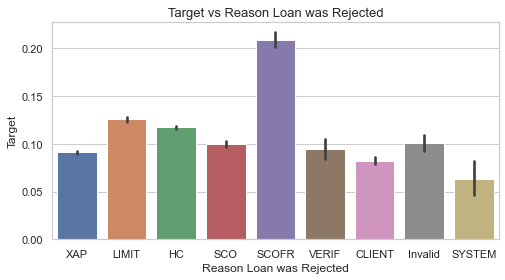

In [90]:
plt.figure(figsize=[8,4])
sns.barplot(merged['CODE_REJECT_REASON'] , merged['TARGET'])
plt.xticks(rotation = None)
plt.xlabel('Reason Loan was Rejected')
plt.ylabel('Target')
plt.title('Target vs Reason Loan was Rejected',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# The loans rejected because of SCOFR reason had maximum defaulting chances.

**Target vs Who accompanied the client during previous application**

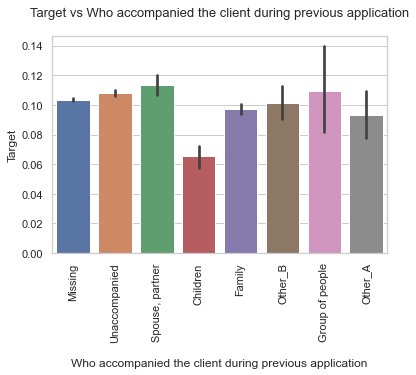

In [91]:
sns.barplot(merged['NAME_TYPE_SUITE'] , merged['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('\nWho accompanied the client during previous application')
plt.ylabel('Target')
plt.title('Target vs Who accompanied the client during previous application\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients who were accompanied by Spouse, Partner or Group of people or Unaccompanied had slightly higher chances of defaulting.
# The cleints accompanied by their children, had least defaulting chances

**Target vs Category of Good for which Loan is Applied**

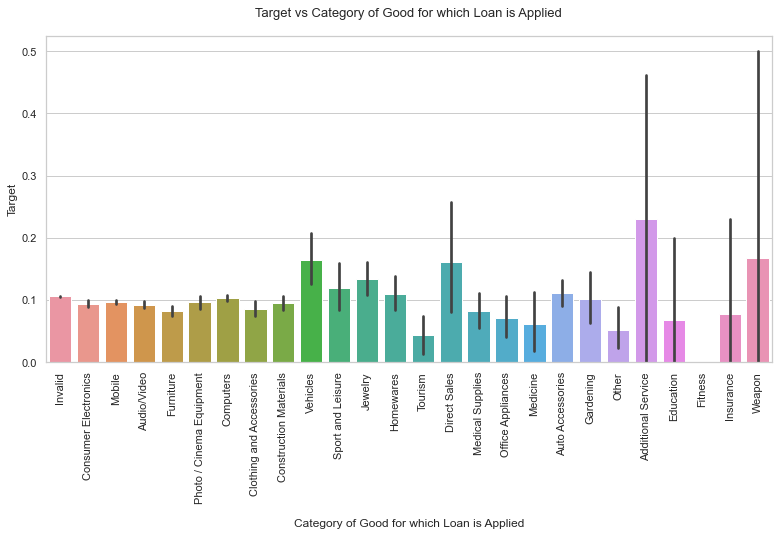

In [92]:
plt.figure(figsize=[13,6])
sns.barplot(merged['NAME_GOODS_CATEGORY'] , merged['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('\nCategory of Good for which Loan is Applied')
plt.ylabel('Target')
plt.title('Target vs Category of Good for which Loan is Applied\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients who applied loan for Additional Service, Weapons, Vehicles or Jewelry had high rate of defaulting
# Tourism and Medicine clients had very less tendency to default.

**Price of Good vs Category of Good for which Loan is Applied**

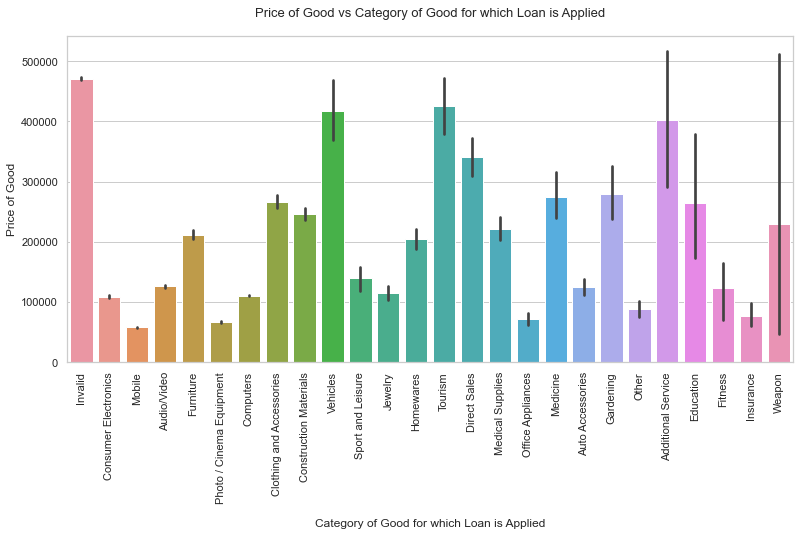

In [93]:
plt.figure(figsize=[13,6])
sns.barplot(merged['NAME_GOODS_CATEGORY'] , merged['AMT_GOODS_PRICE'])
plt.xticks(rotation = 90)
plt.xlabel('\nCategory of Good for which Loan is Applied')
plt.ylabel('Price of Good')
plt.title('Price of Good vs Category of Good for which Loan is Applied\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Tourism is the costliest industry but has minimal defaulting
# Vehicles, Additional Service and Direct Sales have high price and high defaulting tendency (as seen above)

**Target vs Seller Industry**

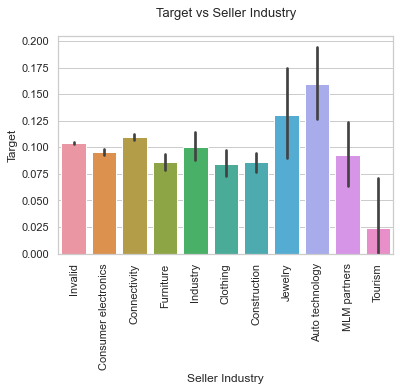

In [94]:
sns.barplot(merged['NAME_SELLER_INDUSTRY'] , merged['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('Seller Industry')
plt.ylabel('Target')
plt.title('Target vs Seller Industry\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# If the seller belonged to Auto technology, Jewelry or Connectivity Indsutry, there was a high chance of defaulting
# Tourism Industry had least chance of defaulting

**Seller Place Area vs Industry of Seller**

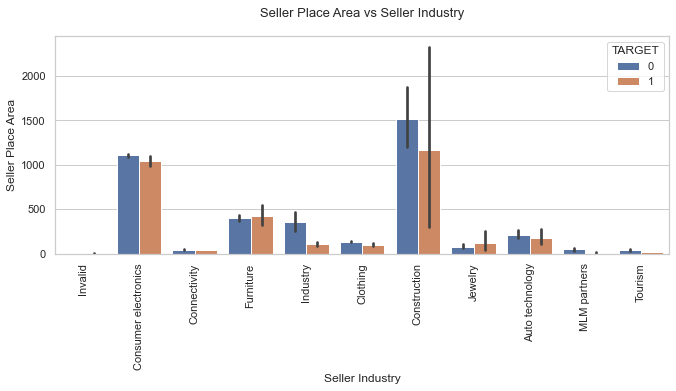

In [95]:
plt.figure(figsize=[11,4])
sns.barplot(merged['NAME_SELLER_INDUSTRY'] , merged['SELLERPLACE_AREA'], merged.TARGET)
plt.xticks(rotation = 90)
plt.xlabel('Seller Industry')
plt.ylabel('Seller Place Area')
plt.title('Seller Place Area vs Seller Industry\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Construction and Consumer electronics have high Seller place area. 

**Target vs Interest Rate Groups**

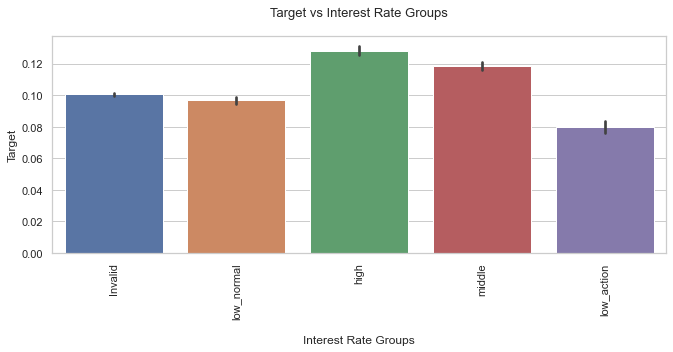

In [96]:
plt.figure(figsize=[11,4])
sns.barplot(merged['NAME_YIELD_GROUP'] , merged['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('\nInterest Rate Groups')
plt.ylabel('Target')
plt.title('Target vs Interest Rate Groups\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# High and middle interest Rates have higher defaulting chances.

**Target vs Product Combination**

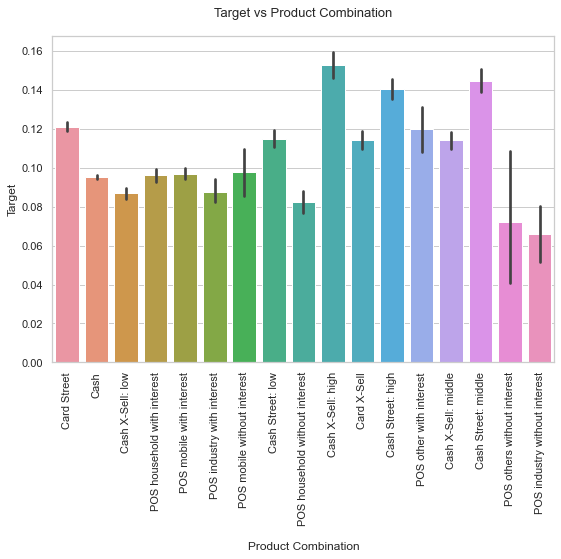

In [97]:
plt.figure(figsize=[9,6])
sns.barplot(merged['PRODUCT_COMBINATION'] , merged['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('\nProduct Combination')
plt.ylabel('Target')
plt.title('Target vs Product Combination\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Cash X-Sell: High, Cash-Street: High and Cash Street: middle have high defaulting chances as compared to other product combinations.

**Pair Plots for Amounts**

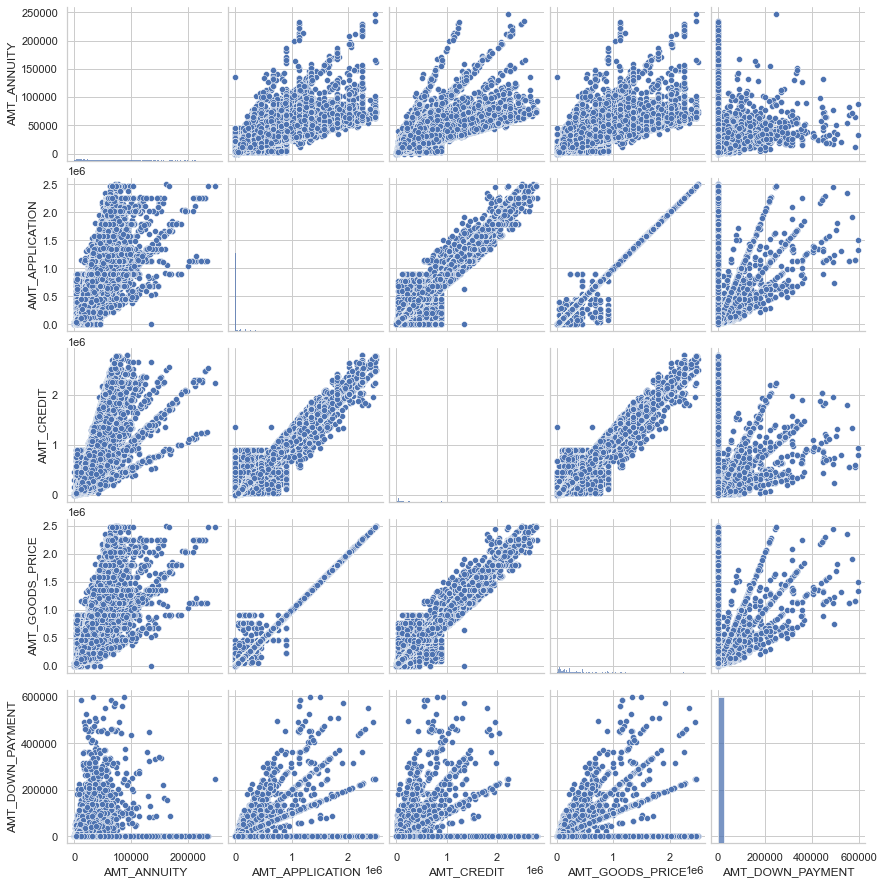

In [98]:
sns.pairplot(merged[['AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_DOWN_PAYMENT']])
plt.show()

# All of these amounts have a positive trend. If any increases, others will also increase.

**Contract Status vs Client Type**

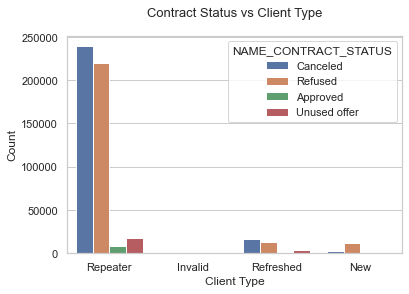

In [99]:
sns.countplot(x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS', data=merged)
plt.xlabel('Client Type')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Contract Status vs Client Type\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Most of the clients are Repeaters and mostly these clients either Canceled or were Refused their previous application

**Contract Status vs Reason loan was rejected**

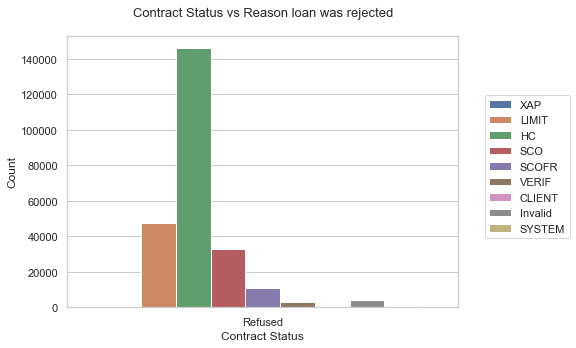

In [100]:
plt.figure(figsize=[7,5])
sns.countplot( merged [ merged.NAME_CONTRACT_STATUS == 'Refused'].NAME_CONTRACT_STATUS, hue= merged.CODE_REJECT_REASON)
plt.legend(loc='best', bbox_to_anchor=(0.8, 0.3, 0.5, 0.5))
plt.xlabel('Contract Status')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Contract Status vs Reason loan was rejected\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Most of the clients loan applications were rejected becuase of reason HC.

**Correlation Heatmap**

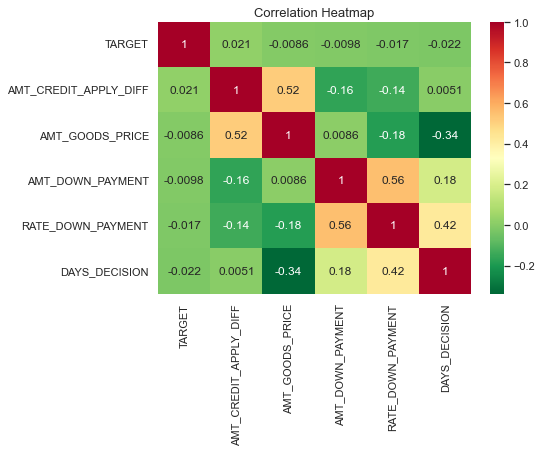

In [101]:
plt.figure(figsize=[7,5])
sns.heatmap(merged[['TARGET','AMT_CREDIT_APPLY_DIFF', 'AMT_GOODS_PRICE','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','DAYS_DECISION',]].corr(),  cmap = 'RdYlGn_r', annot = True)
plt.title('Correlation Heatmap',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Amount of Down Payment and Rate of Down Payment have a very high correlation.
# Price of Goods and the difference between Applcation and Credit Amount has a very high positive correlation. 
# Days of Decision has a very high negative correlation with Goods Price.

### Correlations wrt TARGET
1. TARGET has positive correlation with all AMT_CREDIT_APPLY_DIFF. If the difference between Application Amount and Credit Amount is more, the defaulting chances are also more. 
2. It has a negative correlation with AMT_DOWN_PAYMENT, AMT_GOODS_PRICE and RATE_DOWN_PAYMENT. As the price of Good increases or down payment increases, the defaulting tendency decreases
3. It has a negative correlation with SELLERPLACE_AREA. If the seller place area is more, the defaulting tendency is less
4. It has a negative correlation with DAYS_DECISION. If the days that bank took to decide increase, the chances of client defaulting are less as bank has diligently gone through all checks before giving the loan

### Other correlations
5. AMT_DOWN_PAYMENT has a high positive correlation with RATE_DOWN_PAYMENT
6. AMT_CREDIT_APPLY_DIFF has a high positive correlation with AMT_GOODS_PRICE. AMT_CREDIT_APPLY_DIFF has a negative correlation with AMT_DOWN_PAYMENT and RATE_DOWN_PAYMENT
7. AMT_GOODS_PRICE is negatively correlated to DAYS_DECISION.
8. DAYS_DECISION is positively correlated to AMT_CREDIT_APPLY_DIFF,AMT_DOWN_PAYMENT, and RATE_DOWN_PAYMENT and negatively correlated to AMT_GOODS_PRICE

#### (From Bivariate and Multivariate analysis section) 
9. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE are positively correlated to each other. 